# ~~~~~ Day 13 ~~~~~ 
## Part 1

In [1]:
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

with open('d13.txt', 'r') as f:
    content = f.readlines()

data = [(int(c[0]), int(c[1])) for c in [d.strip('\n').split(',') for d in content[:content.index('\n')]]]
folds = [(l[l.index('=')-1:l.index('=')], int(l[l.index('=')+1:].strip('\n'))) for l in content[content.index('\n')+1:]]
print(data[:5])
print(folds[:5])

[(1148, 688), (1020, 159), (857, 707), (1176, 415), (388, 275)]
[('x', 655), ('y', 447), ('x', 327), ('y', 223), ('x', 163)]


In [2]:
max_x = max(data, key=itemgetter(0))[0]
max_y = max(data, key=itemgetter(1))[1]
grid = np.zeros(shape=(max_y+1, max_x+1), dtype=int)
for x, y in data:
    grid[y, x] = 1

In [3]:
current_grid = grid.copy()
i = 0
for fold_ax, fold_i in folds:
    i += 1
    if fold_ax == 'y':
        grid1 = current_grid[:fold_i]
        grid2 = np.flip(current_grid[fold_i+1:], axis=0)
        grid_diff = grid2.shape[0]-grid1.shape[0]
        if grid_diff < 0:
            g = np.zeros(shape=(grid1.shape[0], grid1.shape[1]), dtype=int)
            g[-grid_diff:] = grid2
            grid2 = g
        current_grid = grid1 | grid2
    if fold_ax == 'x':
        grid1 = current_grid[:,:fold_i]
        grid2 = np.flip(current_grid[:,fold_i+1:], axis=1)
        current_grid = grid1 | grid2
    print(f'Fold {i} ({fold_ax}, {fold_i}), visible points: {np.sum(current_grid == 1)}')

Fold 1 (x, 655), visible points: 781
Fold 2 (y, 447), visible points: 653
Fold 3 (x, 327), visible points: 540
Fold 4 (y, 223), visible points: 455
Fold 5 (x, 163), visible points: 376
Fold 6 (y, 111), visible points: 315
Fold 7 (x, 81), visible points: 261
Fold 8 (y, 55), visible points: 219
Fold 9 (x, 40), visible points: 181
Fold 10 (y, 27), visible points: 150
Fold 11 (y, 13), visible points: 123
Fold 12 (y, 6), visible points: 99


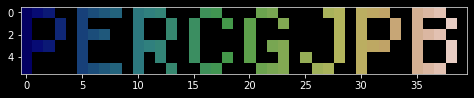

In [4]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.imshow(current_grid*np.arange(1, current_grid.shape[1]+1), cmap='gist_earth', vmin=0, vmax=current_grid.shape[1]+2)

## Part 2

In [5]:
# already done in part 1